In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


**Problem Statement -** 

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

In [2]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 54.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 47.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 77.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.4 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=dae63c63bf4e7cbf8081094e7a7a4d685f30b9e5737d19e6e13f29ca1c859f25
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=8828c582a5458fdfe493c3f7c8ad1be9b486f9d9f40d37cd12

In [3]:
!pip install seaborn

In [4]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.2.0 which is incompatible.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.2 which is incompatible.


In [5]:
# Importing necessary libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from fancyimpute import KNN
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

(CVXPY) Jun 09 02:20:51 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jun 09 02:20:51 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [6]:
df_train = pd.read_csv('/kaggle/input/credit-score-classification/train.csv')
df_test = pd.read_csv('/kaggle/input/credit-score-classification/test.csv')
print("Training data shape: ", df_train.shape)
print("Testing data shape: ", df_test.shape)
df_train.head()

Training data shape:  (100000, 28)
Testing data shape:  (50000, 27)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
df_copy = df_train.copy()
df_copy.drop(['ID', 'SSN', 'Name'], axis = 1, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      100000 non-null  ob

In [8]:
df_copy['Customer_ID'].value_counts().head(10)

CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
CUS_0xc67b    8
CUS_0x8a64    8
CUS_0x35ea    8
CUS_0x5044    8
CUS_0x9dfd    8
Name: Customer_ID, dtype: int64

In [9]:
df_copy.describe().T.style.background_gradient(cmap = 'cividis_r')

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000000,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.000000,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.000000,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.000000,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.000000,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.000000,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.000000,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.000000,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [10]:
df_copy.isnull().sum(axis=0)

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

# EDA and Data Preprocessing

#### Identify issues

* ID, Name and SSN (Not useful)
* Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance Numerical but show as catogery (need to be fixed), Occupation, CreditMix has value "__"
* Data contains outliers
* Num_Credit_Card has zeros
* Type_of_Loan Need to rewrite as 8 columns
* Num_Bank_Accounts contains negative values
* Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,'Credit_Mix' (needs Feature Engineering)
* Target Columns is Imbalanced
* A lot of missing data

#### Dropping all the observations with more than 4 missing values

In [11]:
shape_before_dropping = df_copy.shape
df_copy = df_copy[df_copy.isnull().sum(axis=1) < 4]
print("Records Deleted: ", abs(shape_before_dropping[0] - df_copy.shape[0]))

Records Deleted:  44


##### Handling Numerical Data

In [12]:
# Num of Delayed Payment

def delayed_payment(data):
    data = str(data).strip()
    if "_" in str(data) and "-" in str(data):
        data = str(data).replace("_", "")
        return str(data).replace("-", "")
    elif "-" in str(data):
        return str(data).replace("-", "")
    elif "__" in str(data):
        return str(data).split("__")[1]
    elif "_" in str(data):
        return str(data).split("_")[0]
    else:
        return str(data)
    
df_copy['Num_of_Delayed_Payment'] = df_copy['Num_of_Delayed_Payment'].apply(delayed_payment)
df_copy['Num_of_Delayed_Payment'] = df_copy['Num_of_Delayed_Payment'].astype(np.float64)

In [13]:
# Amount invested monthly

def amt_invest_monthly(data):
    if "__" in str(data):
        return str(data).split("__")[1]
    else:
        return str(data)
    

df_copy['Amount_invested_monthly'] = df_copy['Amount_invested_monthly'].apply(amt_invest_monthly)
df_copy['Amount_invested_monthly'] = df_copy['Amount_invested_monthly'].astype(np.float64)

In [14]:
# Changed Credit Limit

df_copy['Changed_Credit_Limit'] = df_copy['Changed_Credit_Limit'].apply(lambda x: x.split('-')[-1])
df_copy['Changed_Credit_Limit'] = df_copy['Changed_Credit_Limit'].replace('_', np.nan)
df_copy['Changed_Credit_Limit'] = df_copy['Changed_Credit_Limit'].astype(np.float64)

In [15]:
# Num Bank Accounts

df_copy['Num_Bank_Accounts'] = df_copy['Num_Bank_Accounts'].apply(lambda x: abs(x))

In [16]:
# Num_Credit_Card

df_copy['Num_Credit_Card'].replace(0, 1, inplace = True)

In [17]:
# Credit_History_Age

def history_age(age):
    try:
        year = int("".join(re.findall('[0-9]', ''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]', ''.join(age.split("and")[1]))))
        return year*12 + month
    except:
        return np.nan

df_copy['Credit_History_Age'] = df_copy['Credit_History_Age'].apply(history_age)

In [18]:
def general(data):
    if '-' in str(data):
        return str(data).split('-')[1]
    elif '_' in str(data):
        return str(data).split('_')[0]
    else:
        return str(data)

df_copy['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan, inplace = True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    df_copy[i] = df_copy[i].apply(general)
    df_copy[i] = df_copy[i].astype(np.float64)
    print(i + " Cleaned Successfully")

Age Cleaned Successfully
Annual_Income Cleaned Successfully
Num_of_Loan Cleaned Successfully
Outstanding_Debt Cleaned Successfully
Monthly_Balance Cleaned Successfully


In [19]:
df_copy.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,500.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99956 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               99956 non-null  object 
 1   Month                     99956 non-null  object 
 2   Age                       99956 non-null  float64
 3   Occupation                99956 non-null  object 
 4   Annual_Income             99956 non-null  float64
 5   Monthly_Inhand_Salary     84992 non-null  float64
 6   Num_Bank_Accounts         99956 non-null  int64  
 7   Num_Credit_Card           99956 non-null  int64  
 8   Interest_Rate             99956 non-null  int64  
 9   Num_of_Loan               99956 non-null  float64
 10  Type_of_Loan              88576 non-null  object 
 11  Delay_from_due_date       99956 non-null  int64  
 12  Num_of_Delayed_Payment    92986 non-null  float64
 13  Changed_Credit_Limit      97866 non-null  float64
 14  Num_Cr

In [21]:
df_copy.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14964
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11380
Delay_from_due_date             0
Num_of_Delayed_Payment       6970
Changed_Credit_Limit         2090
Num_Credit_Inquiries         1954
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8994
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4457
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

##### Handling Categorical Data

In [22]:
# Payment of Min Amount
# MEans not meaningful because of which replaced 'NM' with 'No'.

df_copy['Payment_of_Min_Amount'] = df_copy['Payment_of_Min_Amount'].replace("NM",  "No")

In [23]:
# Payment Behaviour

df_copy['Payment_Behaviour'] = df_copy['Payment_Behaviour'].replace("!@9#%8",  np.nan)

In [24]:
# Occupation

# id_ = "CUS_0x8517"
# oc = df_copy[df_copy['Customer_ID']==id_]['Occupation'].mode()[0]
# df_copy[df_copy['Customer_ID'] == id_].replace("_______",  oc)

for ID in df_copy[df_copy["Occupation"] == "_______"]["Customer_ID"]:
    occupation = df_copy[df_copy["Customer_ID"] == ID]["Occupation"].mode()[0]
    df_copy[df_copy['Customer_ID'] == ID] = df_copy[df_copy['Customer_ID'] == ID].replace("_______",  occupation)
    
df_copy['Occupation'] = df_copy['Occupation'].replace("_______",  df_copy['Occupation'].mode()[0])
df_copy["Occupation"].value_counts()

Lawyer           7099
Engineer         6857
Architect        6823
Mechanic         6775
Accountant       6741
Scientist        6739
Developer        6717
Media_Manager    6710
Teacher          6671
Entrepreneur     6648
Doctor           6566
Journalist       6532
Manager          6430
Musician         6347
Writer           6301
Name: Occupation, dtype: int64

In [25]:
# Type of Loans

for i in df_copy['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df_copy[i] = df_copy['Type_of_Loan'].str.contains(i)
del df_copy['Type_of_Loan']
df_copy.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,_,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,True,True,False,False,False,False,True,True
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,True,True,False,False,False,False,True,True
2,CUS_0xd40,March,500.0,Scientist,19114.12,NaN,3,4,3,4.0,3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,True,True,False,False,False,False,True,True
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,True,True,False,False,False,False,True,True
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,True,True,False,False,False,False,True,True


In [26]:
# Credit Mix

df_copy['Credit_Mix'] = df_copy['Credit_Mix'].map({"Bad":0.0, "Standard":1.0, "Good":2.0, "_":np.nan})

In [27]:
# Edit the last Type of loan columns from bool to int 
for col in list(df_copy.columns[-8:]):
    df_copy[col] = df_copy[col].astype(float)

In [28]:
# Replacing Customer IDs with normal readable identifiers

cust_id = 1
for ID in df_copy['Customer_ID'].unique() :
    df_copy['Customer_ID'] = df_copy['Customer_ID'].replace(ID,cust_id)
    cust_id += 1 

In [29]:
numerical_columns = df_copy.select_dtypes(exclude = "object").columns
categorical_columns = df_copy.select_dtypes(include = "object").columns

print(numerical_columns)
print(categorical_columns)

Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')
Index(['Month', 'Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')


In [30]:
imputer_num = KNNImputer(n_neighbors = 2)

for col in numerical_columns[1:]:
    imputer_num.fit(df_copy[["Customer_ID", col]])
    df_copy[["Customer_ID", col]] = imputer_num.transform(df_copy[["Customer_ID", col]])

In [31]:
imputer_cat = SimpleImputer(strategy = "most_frequent")
imputer_cat.fit(df_copy[['Payment_Behaviour']])
df_copy[['Payment_Behaviour']] = imputer_cat.transform(df_copy[['Payment_Behaviour']])

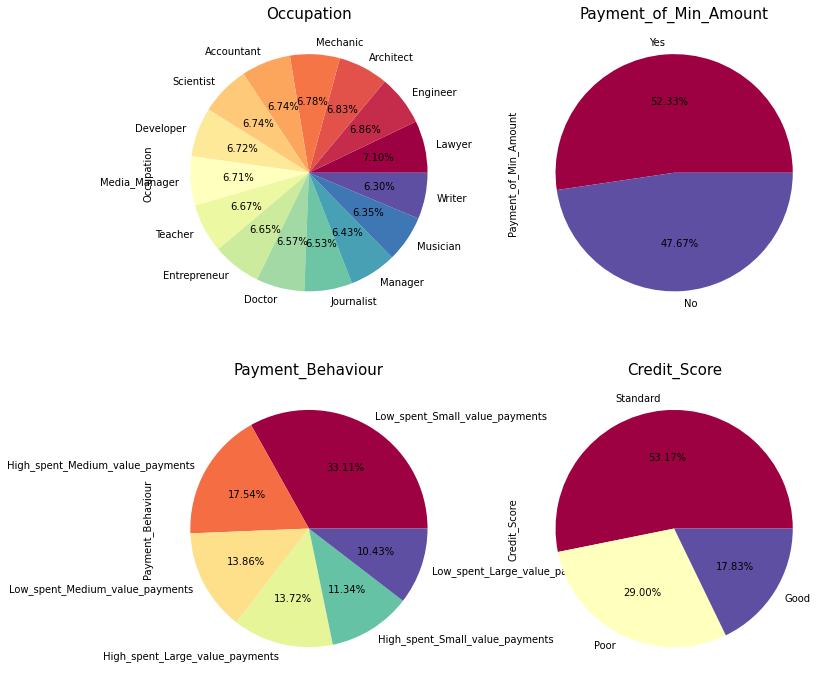

In [32]:
def pie_plot(df, col_list, rows, columns):
    fig, axes = plt.subplots(rows, columns)
    for ax, col in zip(axes.ravel(), col_list):
        df[col].value_counts().plot(ax = ax, kind = 'pie', figsize = (12,12), fontsize = 10, cmap = 'Spectral', autopct='%1.2f%%')
        ax.set_title(str(col), fontsize = 15)
    plt.show()
        
pie_plot(df_copy, categorical_columns[1:], 2, 2)

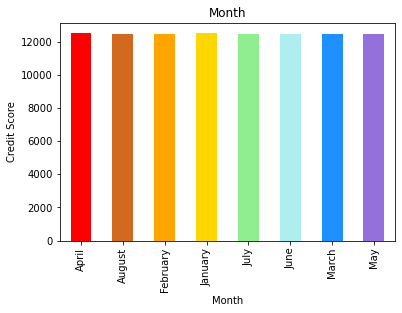

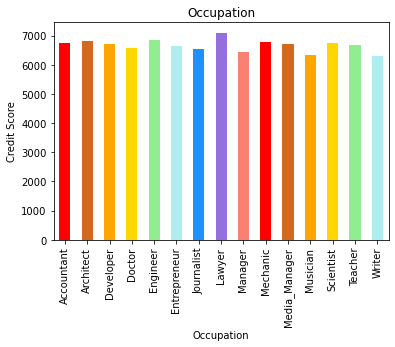

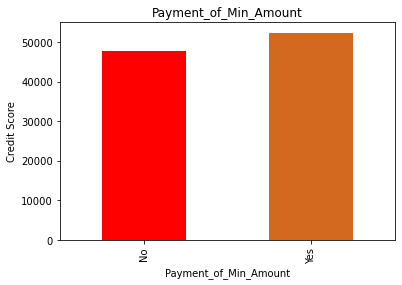

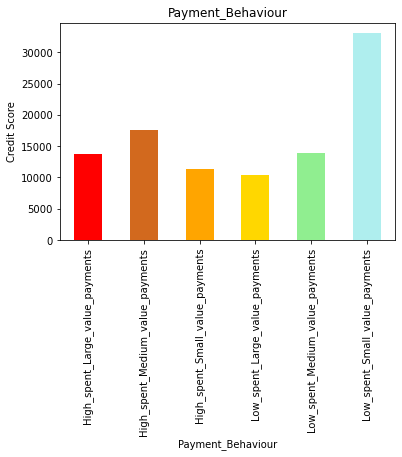

In [33]:
for feature in categorical_columns[:-1]:
    df = df_copy.copy()
    df.groupby(feature)['Credit_Score'].count().plot.bar(color = ['red', 'chocolate', 'orange', 'gold', 'lightgreen', 'paleturquoise', 'dodgerblue', 'mediumpurple', 'salmon'])
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('Credit Score')
    plt.title(feature)
    plt.show()

In [34]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99956 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               99956 non-null  float64
 1   Month                     99956 non-null  object 
 2   Age                       99956 non-null  float64
 3   Occupation                99956 non-null  object 
 4   Annual_Income             99956 non-null  float64
 5   Monthly_Inhand_Salary     99956 non-null  float64
 6   Num_Bank_Accounts         99956 non-null  float64
 7   Num_Credit_Card           99956 non-null  float64
 8   Interest_Rate             99956 non-null  float64
 9   Num_of_Loan               99956 non-null  float64
 10  Delay_from_due_date       99956 non-null  float64
 11  Num_of_Delayed_Payment    99956 non-null  float64
 12  Changed_Credit_Limit      99956 non-null  float64
 13  Num_Credit_Inquiries      99956 non-null  float64
 14  Credit

#### Detecting and Removing Outliers from the DataFrame using the IQR

In [35]:
Q1 = df_copy.quantile(0.005)
Q3 = df_copy.quantile(0.995)
IQR = Q3 - Q1

# train_df = df_copy[~((df_copy < (Q1 - 1.5 * IQR)) | (df_copy > (Q3 + 1.5 * IQR))).any(axis = 1)]
train_df = df_copy[~((df_copy < Q1) | (df_copy > Q3)).any(axis = 1)]
train_df.shape
# (59051, 32)

(88276, 32)

In [36]:
train_df.drop(train_df[train_df["Age"] >= 80].index, inplace=True)
train_df.drop(train_df[train_df["Annual_Income"] >= 500000].index, inplace=True)
train_df.drop(train_df[train_df["Num_Bank_Accounts"] >= 20].index, inplace=True)
train_df.drop(train_df[train_df["Num_Credit_Card"] >= 50].index, inplace=True)
train_df.drop(train_df[train_df["Num_of_Loan"] >= 20].index, inplace=True)
train_df.drop(train_df[train_df["Interest_Rate"] >= 35].index, inplace=True)
train_df.drop(train_df[train_df["Num_of_Delayed_Payment"] >= 30].index, inplace=True)
train_df.drop(train_df[train_df["Num_Credit_Inquiries"] >= 100].index, inplace=True)
train_df.drop(train_df[train_df["Total_EMI_per_month"] >= 2000].index, inplace=True)
train_df.drop(train_df[train_df["Amount_invested_monthly"] >= 1000].index, inplace=True)

In [37]:
train_df.shape

(71495, 32)

Since a huge part of my data is chunked out by removing outliers, hence decide not to remove outliers.

In [38]:
df_copy['Credit_Score'] = df_copy['Credit_Score'].map({"Poor":0.0, "Standard":1.0, "Good":2.0})

In [39]:
df_copy['Credit_Score'].value_counts()

1.0    53145
0.0    28992
2.0    17819
Name: Credit_Score, dtype: int64

#### Data Visualization and Statistics

In [40]:
df_copy.describe(include = 'all').style.background_gradient(cmap = 'YlOrRd')

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
count,99956.000000,99956,99956.000000,99956,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956,99956.000000,99956.000000,99956,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000
unique,nan,8,nan,15,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2,nan,nan,6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,April,nan,Lawyer,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Yes,nan,nan,Low_spent_Small_value_payments,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,12499,nan,7099,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,52311,nan,nan,33094,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,6250.645524,nan,119.467436,nan,175956.544504,4198.522818,17.097323,22.467035,72.493057,10.763946,21.071852,30.833982,10.467030,27.612194,1.065999,1426.427943,32.284505,220.952079,nan,1403.273148,652.639353,nan,403.078999,0.888221,0.358198,0.348643,0.349364,0.351355,0.362179,0.353716,0.344962,0.356027
std,3608.403491,nan,684.461367,nan,1426972.988241,3187.792647,117.430293,129.038119,466.523471,61.801944,14.861513,221.665274,6.668647,191.821805,0.732883,1155.144984,5.116168,99.687232,nan,8307.093203,2037.119756,nan,214.359217,0.675149,0.479473,0.476543,0.476771,0.477396,0.480633,0.478125,0.475358,0.478826
min,1.000000,nan,14.000000,nan,7005.930000,303.645417,0.000000,1.000000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,1.000000,nan,0.000000,0.000000,nan,0.007760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3126.000000,nan,25.000000,nan,19455.490000,1626.594167,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,1.000000,566.210000,28.052567,144.000000,nan,30.338204,75.419810,nan,270.089155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6251.000000,nan,34.000000,nan,37577.820000,3095.978333,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1.000000,1166.300000,32.304876,219.000000,nan,69.266164,137.338378,nan,337.083393,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9375.000000,nan,42.000000,nan,72765.795000,5961.664375,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.860000,9.000000,2.000000,1946.810000,36.495753,302.000000,nan,161.224249,270.335695,nan,471.437138,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


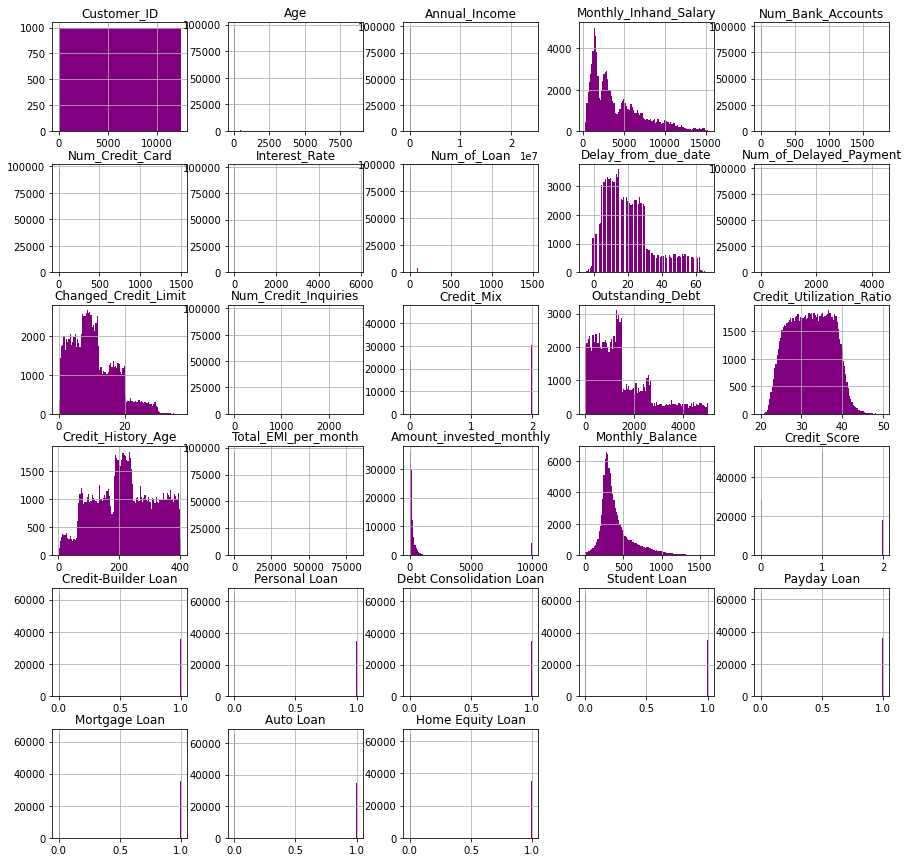

In [41]:
df_copy.hist(bins = 100, figsize = (15, 15), color = 'purple');

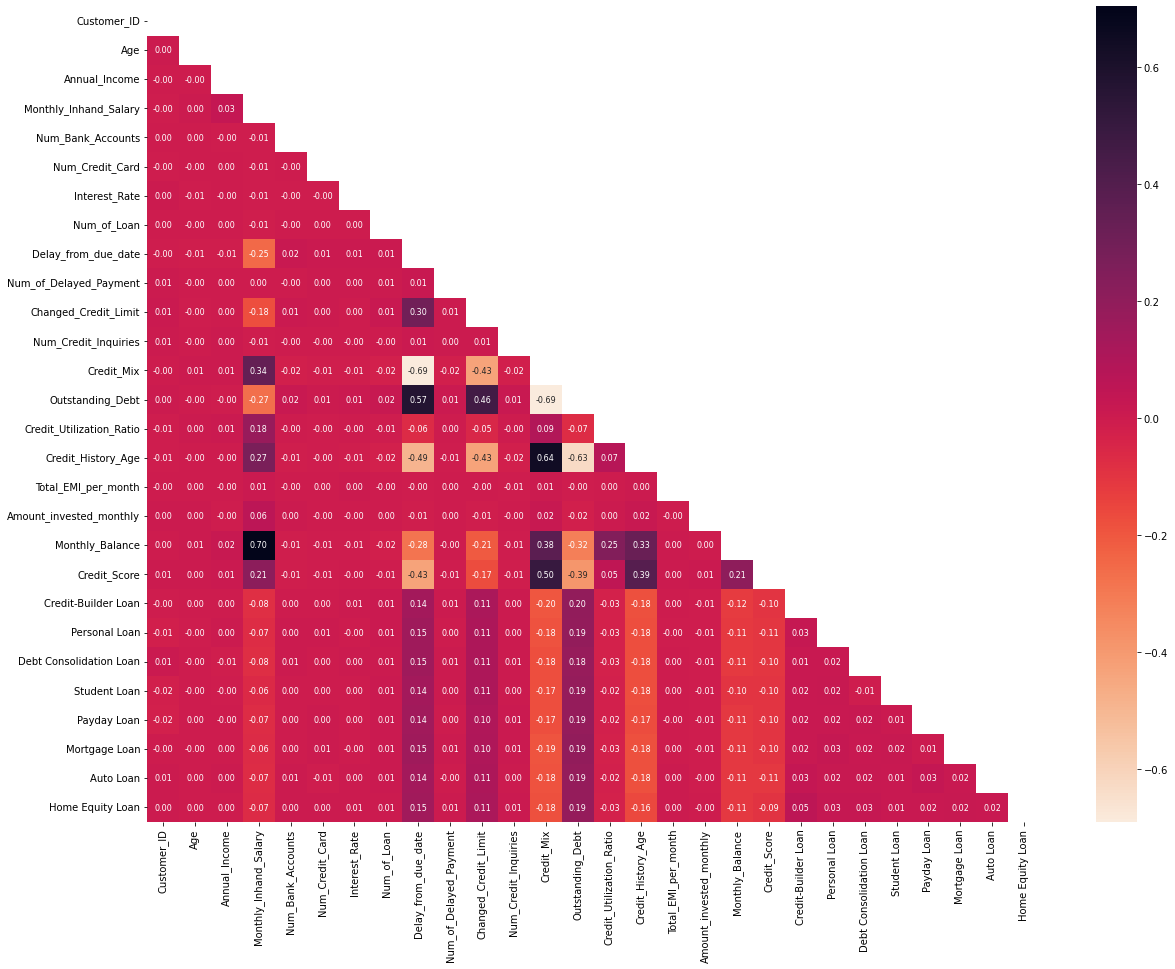

In [42]:
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(df_copy[1:].corr(), dtype = bool))
sns.heatmap(df_copy[1:].corr(), cmap = "rocket_r", mask = mask, annot = True, fmt='.2f', annot_kws={"size":8});

In [43]:
train_df = df_copy.copy()
train_df.drop(["Customer_ID"], axis = 1, inplace=True)

In [44]:
train_df = pd.get_dummies(train_df, drop_first=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99956 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 99956 non-null  float64
 1   Annual_Income                                       99956 non-null  float64
 2   Monthly_Inhand_Salary                               99956 non-null  float64
 3   Num_Bank_Accounts                                   99956 non-null  float64
 4   Num_Credit_Card                                     99956 non-null  float64
 5   Interest_Rate                                       99956 non-null  float64
 6   Num_of_Loan                                         99956 non-null  float64
 7   Delay_from_due_date                                 99956 non-null  float64
 8   Num_of_Delayed_Payment                              99956 non-null  float64


In [45]:
X, y = train_df.drop(["Credit_Score"], axis = 1), train_df["Credit_Score"]

In [46]:
y.value_counts(normalize = True)

1.0    0.531684
0.0    0.290048
2.0    0.178268
Name: Credit_Score, dtype: float64

#### Apply oversampling

Data is Not 100% balanced, Let's try improving it.

In [47]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)
# rus = SMOTE(sampling_strategy='auto')
# X_rus, y_rus = oversample.fit_resample(X, y)

In [48]:
y.value_counts(normalize = True)

2.0    0.392846
1.0    0.392846
0.0    0.214308
Name: Credit_Score, dtype: float64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state =  42, stratify = y)
print("Training Data Shape: ", X_train.shape, y_train.shape)
print("Test Data Shape: ", X_test.shape, y_test.shape)

Training Data Shape:  (108225, 53) (108225,)
Test Data Shape:  (27057, 53) (27057,)


In [50]:
scaler1 = PowerTransformer(method = "yeo-johnson", standardize=True)

X_train_pt = scaler1.fit_transform(X_train)
X_train_pt = pd.DataFrame(X_train_pt, columns = X_train.columns)
X_test_pt = scaler1.transform(X_test)
X_test_pt = pd.DataFrame(X_test_pt, columns = X_test.columns)

Text(0.5, 1.0, 'Features after Power Scaling')

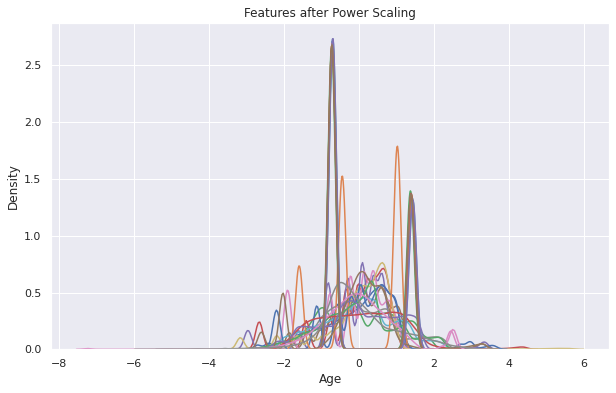

In [51]:
sns.set(rc = {'figure.figsize': (10, 6)})
for i in numerical_columns[1:]:
    sns.kdeplot(X_train_pt[i])
plt.title("Features after Power Scaling")

In [52]:
X_train_pt.shape

(108225, 53)

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pt = pd.DataFrame(pca.fit_transform(X_train_pt))
X_test_pt = pd.DataFrame(pca.transform(X_test_pt))
print("Number of original features is {} and of reduced features is {}".format(X_train_pt.shape, X_test_pt.shape))

Number of original features is (108225, 43) and of reduced features is (27057, 43)


In [54]:
scaler2 = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(0.005, 99.95))

X_train_rs = scaler2.fit_transform(X_train)
X_train_rs = pd.DataFrame(X_train_rs, columns = X_train.columns)
X_test_rs = scaler2.transform(X_test)
X_test_rs = pd.DataFrame(X_test_rs, columns = X_test.columns)

Text(0.5, 1.0, 'Features after Power Scaling')

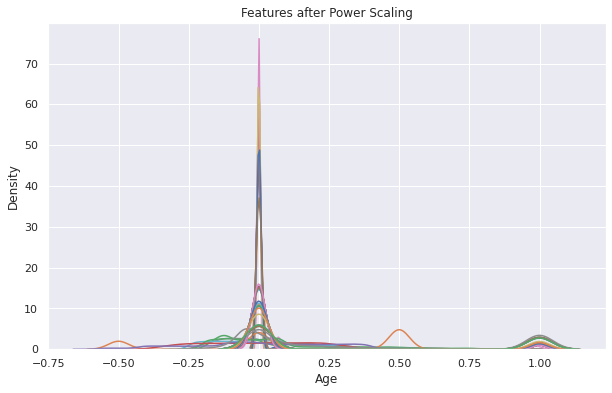

In [55]:
sns.set(rc = {'figure.figsize': (10, 6)})
for i in X_train_rs.columns:
    sns.kdeplot(X_train_rs[i])
plt.title("Features after Power Scaling")

In [70]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_acc, test_acc]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_acc*100) + str(name) + " {}".format(test_acc*100))
    actual = y_test
    predicted = model.predict(X_test)
    print(classification_report(actual, predicted))
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor','Standard','Good'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 74.53524041837602
              precision    recall  f1-score   support

         0.0       0.59      0.55      0.57      5799
         1.0       0.73      0.64      0.68     10629
         2.0       0.83      0.95      0.89     10629

    accuracy                           0.75     27057
   macro avg       0.71      0.72      0.71     27057
weighted avg       0.74      0.75      0.74     27057



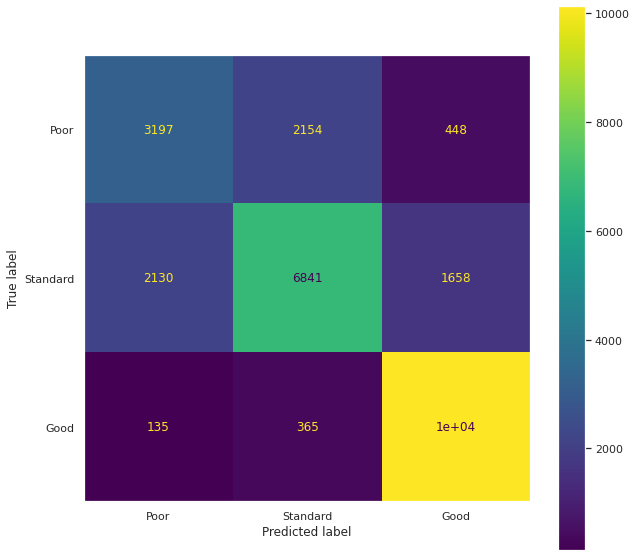

In [72]:
dt = DecisionTreeClassifier(max_depth = 8).fit(X_train_pt, y_train)
tdt = DecisionTreeClassifier().fit(X_train_pt, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train_pt, X_test_pt, y_train, y_test)

Training Accuracy XGBClassifier 89.41834141834141  Test Accuracy XGBClassifier 77.56218353845586
              precision    recall  f1-score   support

         0.0       0.73      0.62      0.67      5799
         1.0       0.77      0.70      0.74     10629
         2.0       0.80      0.93      0.86     10629

    accuracy                           0.78     27057
   macro avg       0.77      0.75      0.76     27057
weighted avg       0.77      0.78      0.77     27057



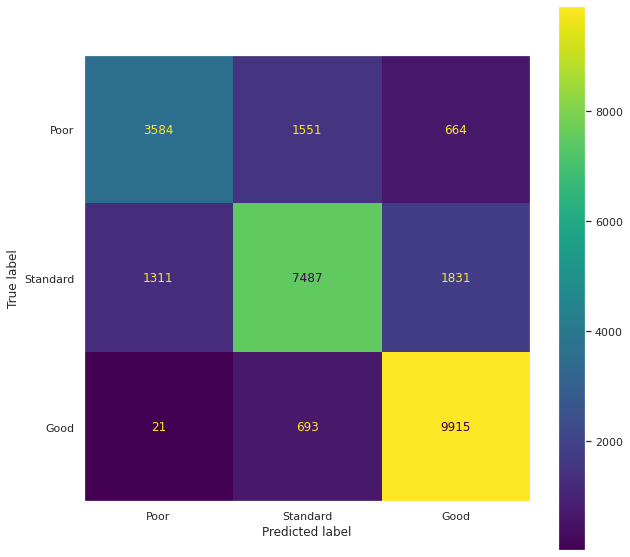

In [73]:
xgb = XGBClassifier(max_depth = 8).fit(X_train_pt, y_train)
evaluate_classification(xgb, "XGBClassifier", X_train_pt, X_test_pt, y_train, y_test)

Training Accuracy RandomForestClassifier 100.0  Test Accuracy RandomForestClassifier 80.27127915142107
              precision    recall  f1-score   support

         0.0       0.74      0.59      0.65      5799
         1.0       0.79      0.75      0.77     10629
         2.0       0.84      0.97      0.90     10629

    accuracy                           0.80     27057
   macro avg       0.79      0.77      0.77     27057
weighted avg       0.80      0.80      0.80     27057



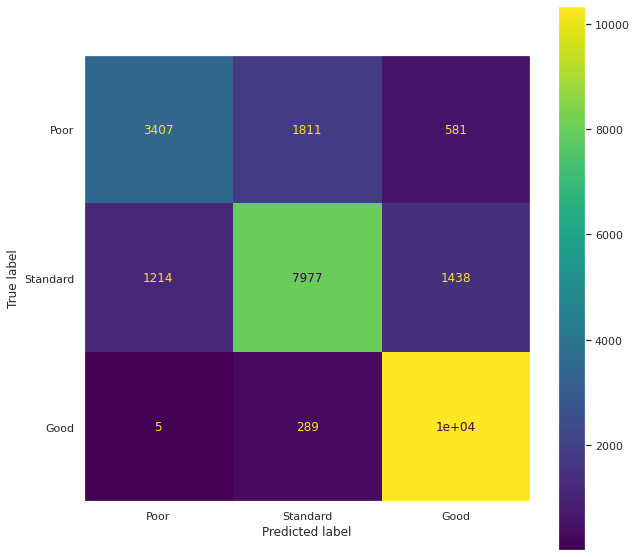

In [74]:
rf = RandomForestClassifier().fit(X_train_pt, y_train)
evaluate_classification(rf, "RandomForestClassifier", X_train_pt, X_test_pt, y_train, y_test)

It is clearly visible from the classification report and the accuracy score that **precision, recall and f1 score** for the Random Forest Classifier seems to be highest (helps in feature selection too).

**Hence we can view that Bagging Algoritm Radom Forest stands out to be the best Classification Model to determine any user's credit score.**